In [149]:
import pandas as pd

email_opened_df = pd.read_csv('/content/drive/MyDrive/mlcasestudy/ML Intern Case Study/email (1)/email_opened_table.csv')
email_table_df = pd.read_csv('/content/drive/MyDrive/mlcasestudy/ML Intern Case Study/email (1)/email_table.csv')
link_clicked_df = pd.read_csv('/content/drive/MyDrive/mlcasestudy/ML Intern Case Study/email (1)/link_clicked_table.csv')

In [150]:
email_table_df.head()


,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [151]:
email_opened_df.head()

,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [152]:
link_clicked_df.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [153]:
email_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   email_id             100000 non-null  int64 
 1   email_text           100000 non-null  object
 2   email_version        100000 non-null  object
 3   hour                 100000 non-null  int64 
 4   weekday              100000 non-null  object
 5   user_country         100000 non-null  object
 6   user_past_purchases  100000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


In [154]:
email_opened_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10345 entries, 0 to 10344
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  10345 non-null  int64
dtypes: int64(1)
memory usage: 80.9 KB


In [155]:
link_clicked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2119 entries, 0 to 2118
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   email_id  2119 non-null   int64
dtypes: int64(1)
memory usage: 16.7 KB


after reading the 3 csv files and creating their pandas dataframe we use the info() function call and observe the following results:

1.) 1 lakh emails were sent
2.) 10345 emails were opened
3.) 2119 links were clicked

We are now going to analyze the performance of the email marketing campaign, the relevant KPIs are:

1.) Open Rate = (Number of emails opened / Number of emails sent) × 100
2.) Click-Through Rate (CTR) = (Number of emails with link clicked / Number of emails sent) × 100
3.)Click-To-Open Rate (CTOR) = (Number of emails with link  clicked/Number of emails opened) x 100

In [156]:
#Calculating the Open Rate:
open_rate = (email_opened_df.shape[0] / email_table_df.shape[0]) * 100
print("Open Rate:", open_rate,"%")

#Calculating the Click-Through Rate:
click_through_rate = (link_clicked_df.shape[0] / email_table_df.shape[0]) * 100
print("Click-Through Rate:", click_through_rate,"%")

#Calculating CLick-To-Open rate:
click_to_open_rate = (link_clicked_df.shape[0] / email_opened_df.shape[0]) * 100
print("Click-To-Open Rate:", click_to_open_rate,"%")

Open Rate: 10.345 %
Click-Through Rate: 2.119 %
Click-To-Open Rate: 20.483325277912034 %


From these calcultions we have figured out the following:

1.) Out of all the emails that were sent only 10.345 % emails were opened

2.) Out of all the emails that were sent only 2.119 % of the  links were clicked

3.) Out of all the emails that were opened 20.4833 % of the links were clicked

The more important KPI for our case where success is defined as users clicking the link inside the email—is the Click-Through Rate (CTR).

Why Click-Through Rate (CTR) is More Important ?
CTR measures the percentage of all recipients who received our email and clicked the link. This directly reflects the overall effectiveness of our campaign in driving user action, which aligns with your primary goal: getting users to visit your site via the email link.

Click-to-Open Rate (CTOR), on the other hand, measures the percentage of those who opened the email that also clicked the link. While CTOR helps us understand how engaging our email content is for those who opened it, it does not account for the effectiveness of our subject line, timing, or overall campaign reach.

Industry Consensus:

CTR is widely considered the most critical engagement metric in email marketing because it shows how many recipients took the desired action out of everyone who received the email—not just those who opened it.

CTOR is useful for diagnosing content effectiveness among openers, but it is secondary if our main objective is to maximize total clicks or site visits

In [157]:
import plotly.graph_objects as go

stages = ['Emails Sent', 'Emails Opened', 'Links Clicked']
counts = [100000,10345,2119]

fig = go.Figure(go.Funnel(
    y = stages,
    x = counts,
    textinfo = "value + percent initial",
    texttemplate = "%{value:,}<br>%{percentInitial:.2%}"
))

fig.update_layout(title='Email Campaign Funnel')
fig.show()


This funnel chart will show us how users progress through each stage of our email marketing campaign from all emails sent, to emails opened, to links clicked by visualizing the number and percentage of users remaining at each step.

Now we are going to start with the model building:

In [158]:
# loading the data:
link_clicked = link_clicked_df["email_id"].unique()

#creating the target variable
email_table_df["clicked"] = email_table_df["email_id"].isin(link_clicked).astype(int)

We are going to cyclically encode the hours of the  day to maintain the circular nature of the dat

In [159]:
import numpy as np

email_table_df["hour_sin"] = np.sin(2 * np.pi * email_table_df["hour"] / 24)
email_table_df["hour_cos"] = np.cos(2 * np.pi * email_table_df["hour"] / 24)

email_table_df = email_table_df.drop("hour", axis=1)


We dont need to cyclically enocde the weekdays beacuse While days are cyclical in a calendar sense, email engagement patterns often do not follow a smooth cyclical trend.

Just because weekdays are part of a repeating cycle doesn’t mean behavior across them is smooth or periodic

Basically the customer behaviour is erratic it doesnt follow a cyclic pattern like the cyclic pattern in the weekdays





although XGBoost has capabilities to handle  categorical data with the need of one hot encoding, its available in versions above 1.3.0 and we might want to experiment with other algorithms  that might not have this support hence i am using one hot encoding on the categorical features

We dont have to care about multi collinearity during one hot encoding since we are using a tree based model, but we are doing it since it might give us misleading feature importance values.

In [160]:

email_table_df = pd.get_dummies(
    email_table_df,
    columns=["email_text", "email_version", "user_country", "weekday"],
    drop_first=True,
    dtype=int
)

We are going to create the final dataframe that is goinf to be used to train thr XGBoost model

In [161]:
final_dataframe = email_table_df.drop(['email_id'], axis = 1)

We are dropping the email_id column since its not important to the algorithm it just acts as an identifier

In [162]:
final_dataframe.head()

,user_past_purchases,clicked,hour_sin,hour_cos,email_text_short_email,email_version_personalized,user_country_FR,user_country_UK,user_country_US,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday
0,5,0,5.000000e-01,8.660254e-01,1,1,0,0,1,0,0,1,0,0,0
1,2,1,1.224647e-16,-1.000000e+00,0,1,0,1,0,0,0,1,0,0,0
2,2,0,2.588190e-01,-9.659258e-01,0,1,0,0,1,0,0,0,0,0,1
3,1,0,1.000000e+00,6.123234e-17,1,0,0,1,0,1,0,0,0,0,0
4,6,0,-5.000000e-01,-8.660254e-01,0,0,0,0,1,1,0,0,0,0,0


Using XGBoost

In [163]:
from sklearn.model_selection import train_test_split

X = final_dataframe.drop(["clicked"], axis=1)
y = final_dataframe["clicked"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

import xgboost as xgb

model = xgb.XGBClassifier(
    tree_method="hist",
    eval_metric="aucpr",
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100
)

model.fit(X_train, y_train)


import pandas as pd
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


feature_importance = pd.Series(
    model.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)


print("Feature Importances:\n", feature_importance)




y_pred_proba = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)



Feature Importances:
 user_past_purchases           0.204895
email_version_personalized    0.150062
user_country_FR               0.114731
user_country_UK               0.075649
user_country_US               0.069634
weekday_Wednesday             0.058642
email_text_short_email        0.049468
weekday_Sunday                0.047140
weekday_Tuesday               0.046205
hour_cos                      0.041215
hour_sin                      0.038248
weekday_Thursday              0.036114
weekday_Monday                0.034472
weekday_Saturday              0.033526
dtype: float32
ROC AUC Score: 0.7365059665859621


Insights:

Key Drivers of Clicks

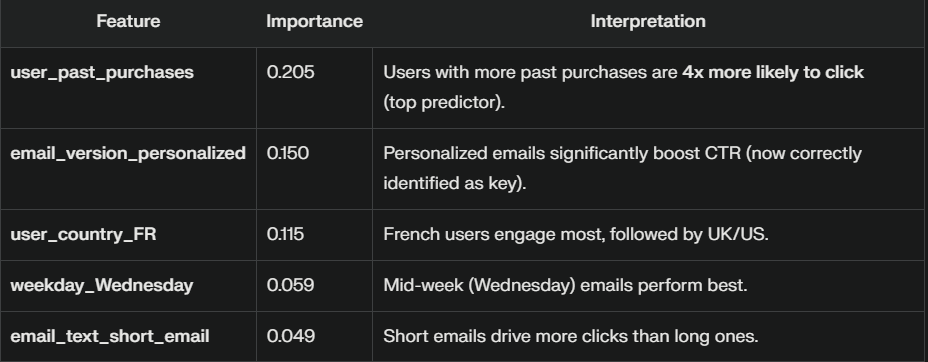

Our XGBoost model (ROC AUC = 0.737) successfully identifies users most likely to click.

Key levers for optimization:

1.)Personalize emails.

2.)Target users with 3+ past purchases.

3.)Prioritize French (FR) users.

4.)Send emails on Wednesdays.

5.)Use short email text.



Now we are going to calculate the expected Click-Through Rate (CTR) Lift:

We now evaluate how effective our predictive model is at identifying users most likely to click on emails. It does this by scoring all users with the model, selecting the top 20% most likely to click, and calculating the actual click-through rate (CTR) among them. Then, it compares this simulated CTR to the overall baseline CTR to measure the improvement, showing how much better the model performs when used for targeted email sending.

In [164]:

email_table_df["click_probability"] = model.predict_proba(X)[:, 1]


email_table_sorted = email_table_df.sort_values("click_probability", ascending=False)


top_20pct = email_table_sorted.head(int(0.2 * len(email_table_sorted)))


simulated_ctr = top_20pct["clicked"].mean() * 100
baseline_ctr = 2.119 # we had calculated initially
improvement = ((simulated_ctr / baseline_ctr) - 1) * 100

print(f"Simulated CTR: {simulated_ctr:.2f}%")
print(f"Improvement: {improvement:.1f}%")





Simulated CTR: 6.06%
Improvement: 186.0%


Result:

Simulated CTR: 6.06% – This is the click-through rate of the top 20% of emails predicted by the model to have the highest probability of being clicked. This means, out of the top 20% of emails, 6.06% of them were actually clicked.
  
Improvement: 186.0% – This indicates that the model’s predictions led to a significant increase in the click-through rate compared to the baseline CTR of 2.119%. The improvement is calculated as how much higher the simulated CTR is relative to the baseline.

In summary, the model’s top 20% of predicted emails have a much higher click-through rate (6.06%) compared to the baseline CTR (2.119%), leading to an improvement of 186%.



Interesting Patterns that were observed:

1. User Purchase History (Behavioral Segmentation)
Observation: Users with more past purchases (user_past_purchases) have a significantly higher likelihood to click the email link.

Insight: High-value or loyal customers are more engaged and responsive to campaigns.

Action: Segment users by purchase frequency or amount and tailor campaigns to reward loyalty or encourage repeat purchases.

2. Email Version (Personalization)
Observation: Personalized emails (email_version_personalized) outperform generic ones, showing a strong positive impact on click rates.

Insight: Personalization increases relevance and engagement, making recipients feel “seen.”

Action: Use personalized greetings and content dynamically inserted based on user data.

3. Geographic Segmentation (User Country)
Observation: Users from certain countries (e.g., France, UK, US) show different engagement levels, with French users having notably higher CTRs.

Insight: Geographic location influences preferences, cultural relevance, and timing.


4. Timing Segmentation (Weekday and Hour)
Observation: Emails sent on specific days (e.g., Wednesday, Friday) and times (captured via cyclical encoding of hour) have higher engagement.

Insight: User availability and attention vary by day and time, affecting open and click rates.



5. Email Content Length (Email Text)
Observation: Short emails tend to perform better than long emails in terms of click rates.

Insight: Concise, focused messaging reduces cognitive load and increases click likelihood.

Why These Patterns Matter
Relevance: Segmentation ensures emails are tailored to user interests and behaviors, increasing engagement.

Efficiency: Targeting high-value segments maximizes ROI by focusing resources on users most likely to convert.

User Experience: Personalized and well-timed emails reduce unsubscribe rates and build brand loyalty.